ALL MODELS DESCIRBED HERE RUN THE ENTIRE DATA PREP AND FEATURE ENGINEERING NOTEBOOKS 
ALSO RUNNING ON HOUR FREQUENCY 
BATCH SIZE 128
EPOCHS 25

sub 39 : 
        model_A = Sequential()

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l1_l2"))
        model_A.add(Dense(64, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 39: 
                64/64 [==============================] - 1s 8ms/step
                1095.9252690802348
                77/77 [==============================] - 1s 8ms/step
                108.4554586038961
                76/76 [==============================] - 3s 10ms/step
                91.25587557006634

sub 40: 
        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 40: 
                64/64 [==============================] - 0s 7ms/step
                997.0125978473582
                77/77 [==============================] - 0s 5ms/step
                112.36317978896103
                76/76 [==============================] - 4s 12ms/step
                74.19562992330016

sub 41: 

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 41: 
                64/64 [==============================] - 3s 12ms/step
                1141.0985812133072
                77/77 [==============================] - 2s 6ms/step
                114.32893668831169
                76/76 [==============================] - 3s 11ms/step
                93.95477041873964
                










In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook for running RNN model

RNN models (Recurent Neural Network) have LSTM neurons that hopefully can pick up on patterns evolving over time. 

In [17]:
import tensorflow
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [18]:
%store -r dm 
dm = dm


In [19]:
dm.combine_all_data()

['X_test_estimated_a', 'data_A']
['X_test_estimated_b', 'data_B']
['X_test_estimated_c', 'data_C']


In [26]:

from sklearn.model_selection import train_test_split


X_A_train = dm.data_A.iloc[:, 1:]
y_A_train = dm.data_A.iloc[:,0]
X_B_train = dm.data_B.iloc[:, 1:]
y_B_train = dm.data_B.iloc[:,0]
X_C_train = dm.data_C.iloc[:, 1:]
y_C_train = dm.data_C.iloc[:,0]

X_train = dm.data.iloc[:, 1:]
y_train = dm.data.iloc[:,0]

X_train_A, X_validate_A, y_train_A, y_validate_A = train_test_split(X_A_train, y_A_train, shuffle=False, train_size=0.9)
#X_validate_A, X_test_A, y_validate_A, y_test_A = train_test_split(X_validate_A, y_validate_A, shuffle=False, test_size=0.3)

X_train_B, X_validate_B, y_train_B, y_validate_B = train_test_split(X_B_train, y_B_train, shuffle=False, train_size=0.9)
#X_validate_B, X_test_B, y_validate_B, y_test_B = train_test_split(X_validate_B, y_validate_B, shuffle=False, test_size=0.3)

X_train_C, X_validate_C, y_train_C, y_validate_C = train_test_split(X_C_train, y_C_train, shuffle=False, train_size=0.9)
#X_validate_C, X_test_C, y_validate_C, y_test_C = train_test_split(X_validate_C, y_validate_C, shuffle=False, test_size=0.3)

X, X_validate, y, y_validate = train_test_split(X_train, y_train, shuffle=False, train_size=0.8)

X_A_submission = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A_train.columns)]
X_B_submission = dm.X_test_estimated_b[dm.X_test_estimated_b.columns.intersection(X_B_train.columns)]
X_C_submission = dm.X_test_estimated_c[dm.X_test_estimated_c.columns.intersection(X_C_train.columns)]
X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X_train.columns)]

print(X_train_A.shape, y_train_A.shape, X_validate_A.shape, y_validate_A.shape)
print(X_train_B.shape, y_train_B.shape, X_validate_B.shape, y_validate_B.shape)
print(X_train_C.shape, y_train_C.shape, X_validate_C.shape, y_validate_C.shape)

print(X_train.shape, y_train.shape, X_submission.shape)

y_train

(122616, 49) (122616,) (13625, 49) (13625,)
(121050, 49) (121050,) (13451, 49) (13451,)
(99674, 49) (99674,) (11075, 49) (11075,)
(381491, 49) (381491,) (2160, 48)


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
381486    0.0
381487    0.0
381488    0.0
381489    0.0
381490    0.0
Name: pv_measurement, Length: 381491, dtype: float64

In [21]:
import LSTM_class

model_number_features = X.shape[1]
model_number_timesteps = 1

super_model = LSTM_class.RNN_Network() ## initialize LSTM Class 
super_model.create_model(model_number_features, model_number_timesteps) ## builds model for A B and C, builds same for each 



2023-11-03 16:03:42.623581: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-03 16:03:42.623614: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-03 16:03:42.623633: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-03 16:03:42.623906: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-03 16:03:42.624427: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            91136     
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dense (Dense)               (None, 1, 128)            8320      
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 dense_1 (Dense)             (None, 1, 64)             8

In [22]:
#super_model.fit_model(super_model.model_A, X_train_A, y_train_A)

super_model.fit_model(super_model.model_A, X, y, training_parameters={"epochs":100, "batch_size":128, "timesteps":model_number_timesteps}, kfolds=True)


Epoch Number: 0
Fold 1
Train: index=[ 30520  30521  30522 ... 305189 305190 305191]
Test: index=[    0     1     2 ... 30517 30518 30519]


2023-11-03 16:04:23.010661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2146/2146 [==============================] - 357s 161ms/step - loss: 0.0971 - val_loss: 0.0917
Fold 2
Train: index=[     0      1      2 ... 305189 305190 305191]
Test: index=[30520 30521 30522 ... 61037 61038 61039]
2146/2146 [==============================] - 340s 159ms/step - loss: 0.0943 - val_loss: 0.1156
Fold 3
Train: index=[     0      1      2 ... 305189 305190 305191]
Test: index=[61040 61041 61042 ... 91556 91557 91558]
2146/2146 [==============================] - 343s 160ms/step - loss: 0.0929 - val_loss: 0.1277
Fold 4
Train: index=[     0      1      2 ... 305189 305190 305191]
Test: index=[ 91559  91560  91561 ... 122075 122076 122077]
2146/2146 [==============================] - 342s 159ms/step - loss: 0.0932 - val_loss: 0.1254
Fold 5
Train: index=[     0      1      2 ... 305189 305190 305191]
Test: index=[122078 122079 122080 ... 152594 152595 152596]
2146/2146 [==============================] - 345s 161ms/step - loss: 0.0969 - val_loss: 0.0919
Fold 6
Train: index=[    

KeyboardInterrupt: 

not emptu


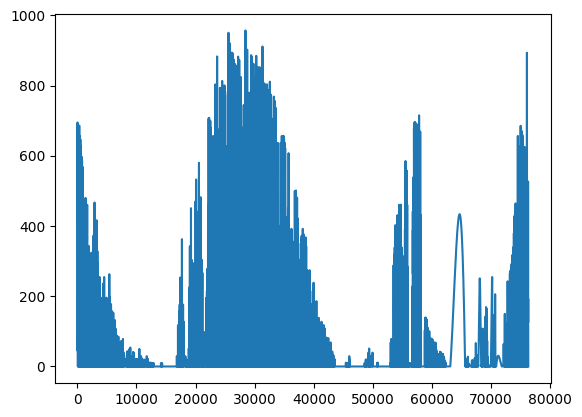

In [23]:
gt = y_validate
gt = dm.scaling(y_validate, "C")
gt = gt.reset_index().drop("index", axis=1)

plt.plot(gt)
plt.show()



In [24]:

preds = super_model.model_A.predict((np.asarray(X_validate).reshape(int(X_validate.shape[0]/model_number_timesteps), model_number_timesteps, X_validate.shape[1])).astype(float))
preds = dm.scaling(preds, "C")
gt = y_validate
gt = dm.scaling(gt, "C")


2385/2385 [==============================] - 34s 13ms/step
not emptu
not emptu


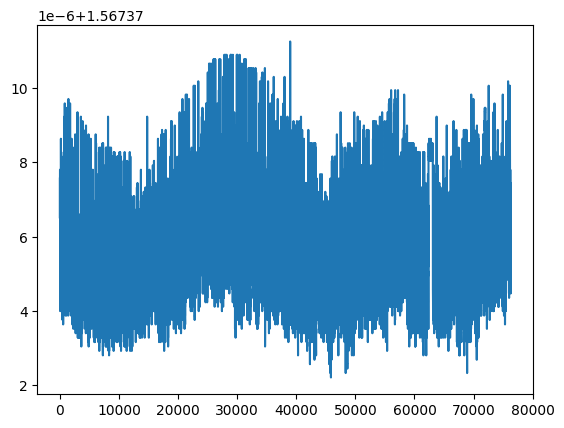

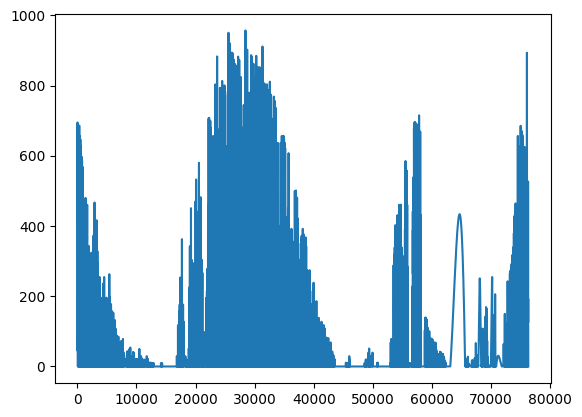

ResourceExhaustedError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[76299,76299,1] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator Simple allocator [Op:Sub] name: 

In [25]:
from keras.losses import mean_absolute_error

plt.plot(np.asarray(preds).reshape((preds.shape[0], )))

plt.show()

gt = pd.DataFrame(gt)
gt = gt.reset_index().drop("index", axis=1)

plt.plot(gt)
plt.show()

error = mean_absolute_error(gt, preds)
print(np.sum(error)/error.shape[0])


## Testing our model locally

In [27]:
## Specify the model to be used
pred_A = super_model.model_A.predict(np.asarray(X_A_submission).reshape((X_A_submission.shape[0], 1, X_A_submission.shape[1])).astype(float))
pred_B = super_model.model_A.predict(np.asarray(X_B_submission).reshape((X_B_submission.shape[0], 1, X_B_submission.shape[1])).astype(float))
pred_C = super_model.model_A.predict(np.asarray(X_C_submission).reshape((X_C_submission.shape[0], 1, X_C_submission.shape[1])).astype(float))

pred_A = pd.DataFrame(pred_A.reshape((720,)))
pred_B = pd.DataFrame(pred_B.reshape((720,)))
pred_C = pd.DataFrame(pred_C.reshape((720,)))

pred_A = dm.scaling(pred_A, "A")
pred_B = dm.scaling(pred_B, "B")
pred_C = dm.scaling(pred_C, "C")

test = pd.read_csv('test.csv')

df_mid = pd.concat([pred_A, pred_B], ignore_index=True)

df = pd.concat([df_mid, pred_C], join="inner", ignore_index=True)

# df[df<0] = 0

# NAME THE FILE 
df.to_csv("sub84.csv")


23/23 [==============================] - 0s 13ms/step
not emptu
not emptu
not emptu
